- 각 행벡터는 데이터와 가중치 행렬 사이의 행렬곱과 절편 벡터의 합으로 표현된다 가정
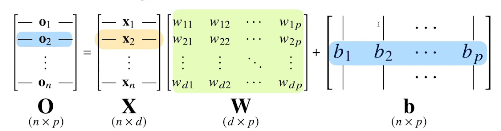

- O : 행벡터
- X : 데이터
- W : 가중치 행렬
- b : 절편 벡터

## **소프트맥스 연산**
- 소프트맥스(softmax)함수는 모델의 출력을 확률로 해석할 수 있게 변환해주는 연산이다.
- 분류 문제를 풀 때 선형모델과 소프트맥스 함수를 결합하여 예측한다.
- 출력 벡터에 softmax 함수를 합성하면 확률벡터가 되므로 특정 클래스 k에 속할 확률로 해석할 수 있다.
- 그러나 추론을 할 때는 원-핫(one-hot)벡터로 최댓값을 가진 주소만 1로 출력하는 연산을 사용해서 softmax를 사용하진 않는다.

In [1]:
import numpy as np

In [2]:
def softmax(vec):
    denumerator = np.exp(vec - np.max(vec, axis=-1, keepdims=True))
    numerator = np.sum(denumerator, axis=-1, keepdims=True)
    val = denumerator / numerator
    return val

In [3]:
vec = np.array([[1, 2, 0], [-1, 0, 1], [10, 0, 10]])
softmax(vec)

array([[2.44728471e-01, 6.65240956e-01, 9.00305732e-02],
       [9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
       [4.99988650e-01, 2.26994496e-05, 4.99988650e-01]])

In [4]:
def one_hot(val, dim):
    return [np.eye(dim)[_] for _ in val]

def one_hot_encoding(vec):
    vec_dim = vec.shape[1]
    vec_argmax = np.argmax(vec, axis=-1)
    return one_hot(vec_argmax, vec_dim)

In [5]:
print(one_hot_encoding(vec))
print(one_hot_encoding(softmax(vec)))

[array([0., 1., 0.]), array([0., 0., 1.]), array([1., 0., 0.])]
[array([0., 1., 0.]), array([0., 0., 1.]), array([1., 0., 0.])]


## **활성함수**
- 신경망은 선형모델과 활성함수(activation function)를 합성한 함수이다.
- 활성함수를 쓰지 않으면 딥러닝은 선형모형과 차이가 없다.
- 활성함수는 보통 선형 모델과 행렬 곱을 사용하지 않고 비선형 함수로서 선형 모델로 나오는 출력물 각각의 원소에 적용되는 것을 정의하게 된다.
- 시그모이드(sigmoid) 함수나 tanh 함수는 전통적으로 많이 쓰이던 활성함수지만 딥러닝에선 ReLU 함수를 많이 쓰고 있다.

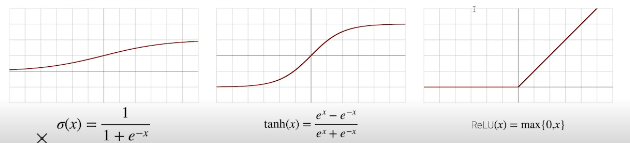

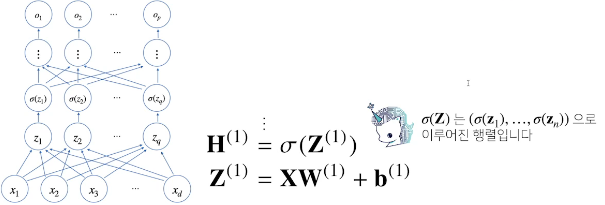

- 다층(multi-layer) 퍼셉트론(MLP)은 신경망이 여러층 합성된 함수이다.

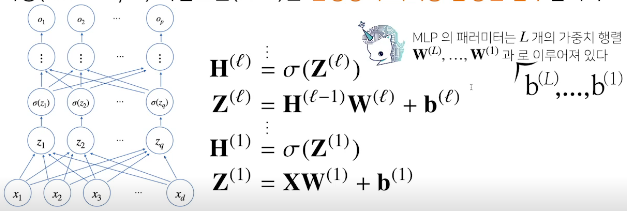
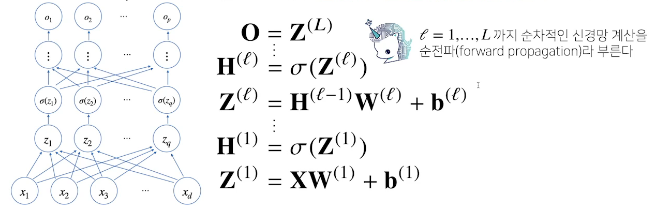

### **여러 층을 쌓는 이유**
- 이론적으로는 2층 신경망으로도 임의의 연속함수를 근사할 수 있다.
- 그러나 층이 깊어질수록 목적함수를 근사하는데 필요한 뉴런(노트)의 숫자가 훨씬 빨리 줄어들어 좀 더 효율적으로 학습이 가능하다.
- 층이 얇으면 필요한 뉴런의 숫자가 기하급수적으로 늘어나서 넓은(wide) 신경망이 되어야 한다.

## **딥러닝 학습원리: 역전파(backpropagation) 알고리즘**
- 각 층 패러미터의 그레디언트 벡터는 윗층부터 역순으로 계산하게 된다.
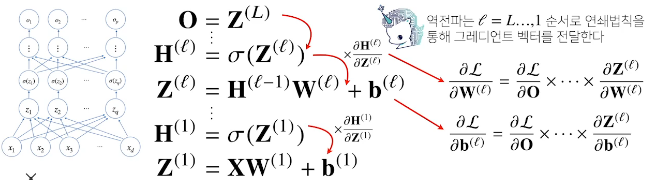
- 딥러닝은 연쇄법칙을 통해 그레디언트를 밑에 있는 층에 전달하면서 가중치를 업데이트한다.

**역전파 알고리즘 원리 이해**
- 역전파 알고리즘은 합성함수 미분법인 연쇄법칙(chain-rule) 기반 자동미분(auto-differentiation)을 사용한다.

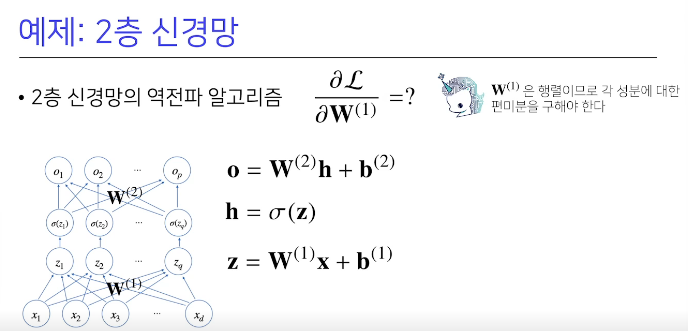
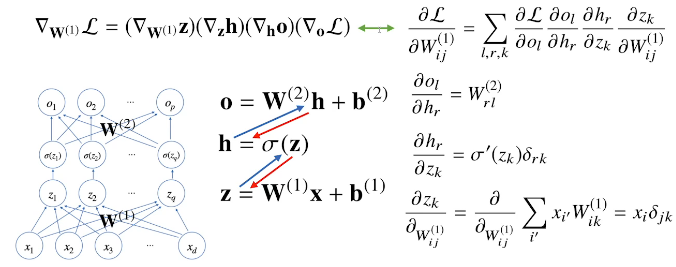
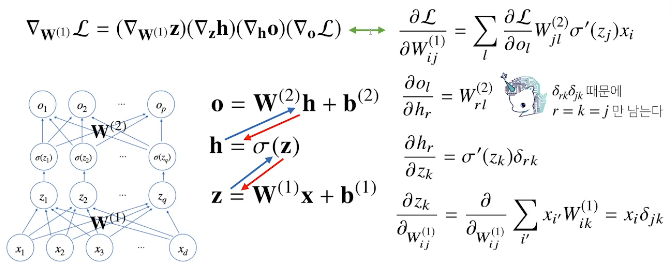